# See you next year!
This notebook goes over how to use a neural network to read written numbers. 
This year's coding club has come to a close with this notebook, thank you for coming.

## Imports and Loading Data

In [1]:
import keras # machine learning
import numpy as np # data management
import matplotlib.pyplot as plt # visuals
from keras.datasets import mnist # data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Let's see what the shapes of these arrays are

In [2]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Data Preprocessing

For classification, neural networks like to have a column for each category, with 0 meaning not present and 1 meaning present, rather than just one column for all of the categories. 
One hot encoding is the transformation from one column to many columns.

In [3]:
def onehot(y):
  encoded = []
  for x in y:
    newarr = []
    for i in range(x):
        newarr.append(0)
    newarr.append(1)
    for i in range(9-x):
        newarr.append(0)
    encoded.append(newarr)
  return np.array(encoded)



### Encode and Scale
We encode the categories/labels with the function and then scale the brightness values of the images to be values between 0 and 1. Question: Why divide by 255?

In [4]:
# Encode categories
y_train = onehot(y_train)
y_test = onehot(y_test)
# Scaling the pixel values 
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model Creation

We are going to use a convolutional neural network (CNN) to do image recognition. You can experiment with the parameters!

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = keras.Sequential([
  Conv2D(500, 3, padding='same', activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(strides=(2, 2)),
  Conv2D(300, 3, padding='same', activation='relu'),
  MaxPooling2D(strides=(2, 2)),
  Conv2D(100, 3, padding='same', activation='relu'),
  MaxPooling2D(strides=(2, 2)),
  Flatten(),
  Dense(10, activation='relu'),
  Dense(10, activation='softmax')
])

Let's get an idea of the size of our network!

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 500)       5000      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 500)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 300)       1350300   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 300)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 100)         270100    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 100)        0

That's a lot of parameters...

### Compiling
Optimizers decrease the learning rate as the model gets better, the loss is basically the error, and accuracy is the percent of images that are read correctly. 

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Training the Model

In [8]:
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

Epoch 1/4
1875/1875 [==============================] - 42s 14ms/step - loss: 0.1640 - accuracy: 0.9511 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 2/4
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0526 - accuracy: 0.9847 - val_loss: 0.0373 - val_accuracy: 0.9882
Epoch 3/4
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0379 - accuracy: 0.9888 - val_loss: 0.0373 - val_accuracy: 0.9892
Epoch 4/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0397 - val_accuracy: 0.9881


## Model Assessment

### Accuracy (Score)

Text(0.5, 1.0, 'Accuracy and Validation Accuracy')

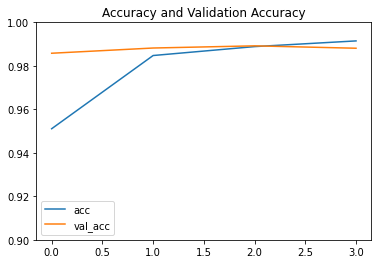

In [9]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.ylim((.90, 1))
plt.legend()
plt.title('Accuracy and Validation Accuracy')

### Loss (Error)

Text(0.5, 1.0, 'Loss and Validation Loss')

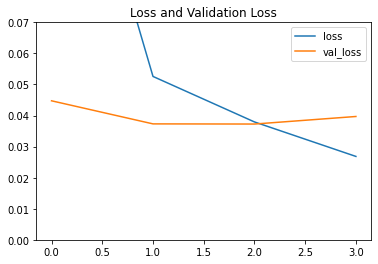

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim((0, 0.07))
plt.legend()
plt.title('Loss and Validation Loss')

### Plotting Examples
To get an idea of what our model can do, we should plot some of its predictions along with the true answer.

Text(0.5, 1.0, 'P: 7, T: 7')

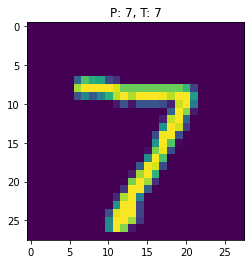

In [11]:
plt.imshow(X_test[0])
prediction = model.predict(X_test[0].reshape((1, 28, 28, 1)))
plt.title("P: {}, T: {}".format(prediction.argmax(), y_test[0].argmax()))

#### Plotting Incorrect Guesses
To see if the model is wrong to an acceptable degree, let's plot 100 numbers that it read incorrectly. 

Text(0.5, 0.98, 'Incorrect Responses')

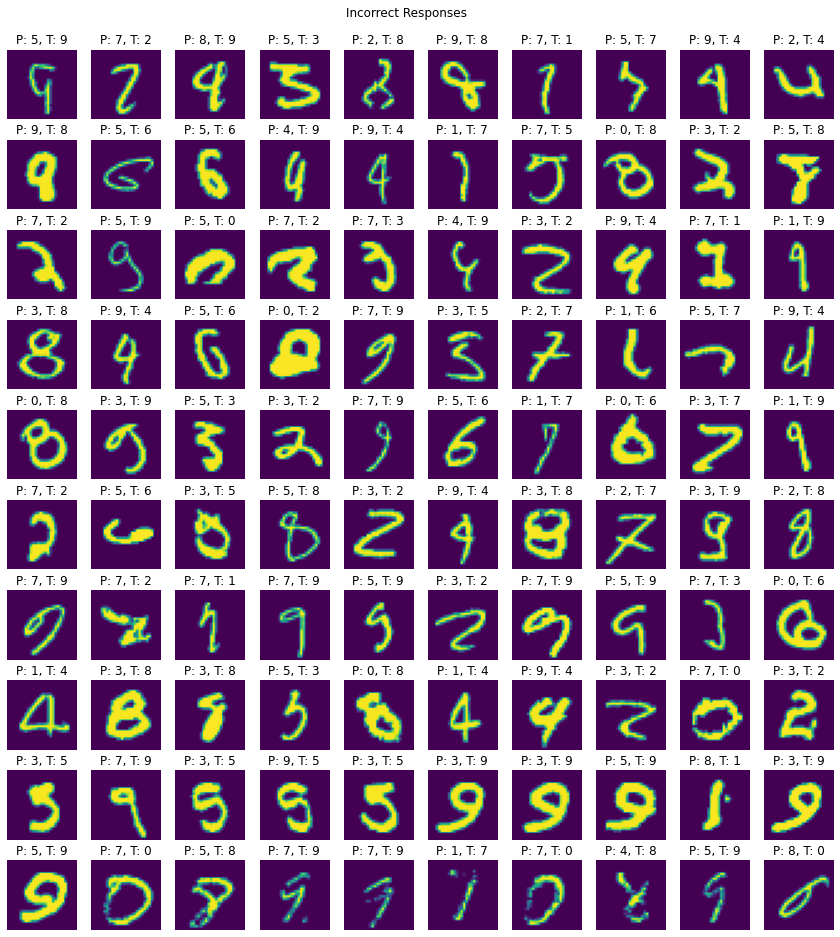

In [12]:
k = 10
fig, axes = plt.subplots(k, k, figsize=(15, 15))
predictions = model.predict(X_test.reshape((-1, 28, 28, 1)))
predictions = [x.argmax() for x in predictions]
index = 0
for i in range(k):
    for j in range(k):
        while predictions[index] == y_test[index].argmax():
            index += 1
        axes[i, j].axis('off')
        axes[i, j].imshow(X_test[index])
        axes[i, j].set_title("P: {}, T: {}".format(predictions[index], y_test[index].argmax()))
        index += 1
plt.subplots_adjust(top=0.94, wspace=0.05, hspace=0.3)
fig.suptitle("Incorrect Responses")